In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

%matplotlib inline
sns.set_style("darkgrid")

In [4]:
file = "Data/year_temps.csv"

In [5]:
df = pd.read_csv(file, encoding = 'latin-1')
df.head()

,ï»¿Area Code,Area,Months Code,Months,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1961,1961,Â°C,-0.059,Fc
1,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1962,1962,Â°C,-0.154,Fc
2,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1963,1963,Â°C,0.820,Fc
3,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1964,1964,Â°C,-0.728,Fc
4,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1965,1965,Â°C,0.001,Fc


In [6]:
#get column names
for col in df.columns:
    print(col)

ï»¿Area Code
Area
Months Code
Months
Element Code
Element
Year Code
Year
Unit
Value
Flag


In [7]:
df_1 = pd.DataFrame(df)
df_1

,ï»¿Area Code,Area,Months Code,Months,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1961,1961,Â°C,-0.059,Fc
1,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1962,1962,Â°C,-0.154,Fc
2,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1963,1963,Â°C,0.820,Fc
3,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1964,1964,Â°C,-0.728,Fc
4,2,Afghanistan,7020,Meteorological year,7271,Temperature change,1965,1965,Â°C,0.001,Fc
...,...,...,...,...,...,...,...,...,...,...,...
14492,5873,OECD,7020,Meteorological year,7271,Temperature change,2014,2014,Â°C,0.777,Fc
14493,5873,OECD,7020,Meteorological year,7271,Temperature change,2015,2015,Â°C,1.229,Fc
14494,5873,OECD,7020,Meteorological year,7271,Temperature change,2016,2016,Â°C,1.804,Fc
14495,5873,OECD,7020,Meteorological year,7271,Temperature change,2017,2017,Â°C,1.286,Fc


In [8]:
clean_df = df_1.drop(["ï»¿Area Code", "Months Code", "Element Code" , "Element" , "Year Code", "Unit", "Flag" , "Months"], axis =1)
clean_df

,Area,Year,Value
0,Afghanistan,1961,-0.059
1,Afghanistan,1962,-0.154
2,Afghanistan,1963,0.820
3,Afghanistan,1964,-0.728
4,Afghanistan,1965,0.001
...,...,...,...
14492,OECD,2014,0.777
14493,OECD,2015,1.229
14494,OECD,2016,1.804
14495,OECD,2017,1.286


In [9]:
new_df = pd.DataFrame(clean_df)
new_df

,Area,Year,Value
0,Afghanistan,1961,-0.059
1,Afghanistan,1962,-0.154
2,Afghanistan,1963,0.820
3,Afghanistan,1964,-0.728
4,Afghanistan,1965,0.001
...,...,...,...
14492,OECD,2014,0.777
14493,OECD,2015,1.229
14494,OECD,2016,1.804
14495,OECD,2017,1.286


In [10]:
col_new_df = new_df.rename(columns = {"Area" : "Country", "Months" : "Month" , "Value" : "Change in Temp (C)"})
col_new_df

,Country,Year,Change in Temp (C)
0,Afghanistan,1961,-0.059
1,Afghanistan,1962,-0.154
2,Afghanistan,1963,0.820
3,Afghanistan,1964,-0.728
4,Afghanistan,1965,0.001
...,...,...,...
14492,OECD,2014,0.777
14493,OECD,2015,1.229
14494,OECD,2016,1.804
14495,OECD,2017,1.286


In [11]:
#export data into csv
col_new_df.to_csv('Final_CSVs/year_temp.csv', index = False)

In [13]:
Ant_df = col_new_df.loc[col_new_df['Country']== 'Antarctica']
Ant_df.head()

,Country,Year,Change in Temp (C)
406,Antarctica,1961,0.236
407,Antarctica,1962,-0.275
408,Antarctica,1963,0.193
409,Antarctica,1964,-0.369
410,Antarctica,1965,-0.191


In [14]:
Asia_df = col_new_df.loc[col_new_df['Country']== 'Asia']
Asia_df.head()

,Country,Year,Change in Temp (C)
13047,Asia,1961,0.065
13048,Asia,1962,0.019
13049,Asia,1963,0.270
13050,Asia,1964,-0.177
13051,Asia,1965,-0.019


In [15]:
Af_df = col_new_df.loc[col_new_df['Country']== 'Africa']
Af_df.head()

,Country,Year,Change in Temp (C)
12409,Africa,1961,0.039
12410,Africa,1962,-0.003
12411,Africa,1963,0.076
12412,Africa,1964,-0.110
12413,Africa,1965,-0.177


In [16]:
eur_df = col_new_df.loc[col_new_df['Country']== 'Europe']
eur_df.head()

,Country,Year,Change in Temp (C)
13395,Europe,1961,0.891
13396,Europe,1962,0.346
13397,Europe,1963,0.124
13398,Europe,1964,-0.548
13399,Europe,1965,-0.411


In [18]:
Aus_df = col_new_df.loc[col_new_df['Country']== 'Australia']
Aus_df.head()

,Country,Year,Change in Temp (C)
607,Australia,1961,0.119
608,Australia,1962,0.109
609,Australia,1963,-0.146
610,Australia,1964,-0.063
611,Australia,1965,0.069


In [19]:
na_df = col_new_df.loc[col_new_df['Country']== 'Northern America']
na_df.head()

,Country,Year,Change in Temp (C)
12815,Northern America,1961,0.013
12816,Northern America,1962,-0.059
12817,Northern America,1963,0.376
12818,Northern America,1964,-0.288
12819,Northern America,1965,-0.577


In [20]:
sa_df = col_new_df.loc[col_new_df['Country']== 'South America']
sa_df.head()

,Country,Year,Change in Temp (C)
12989,South America,1961,0.158
12990,South America,1962,-0.164
12991,South America,1963,0.142
12992,South America,1964,-0.217
12993,South America,1965,-0.013


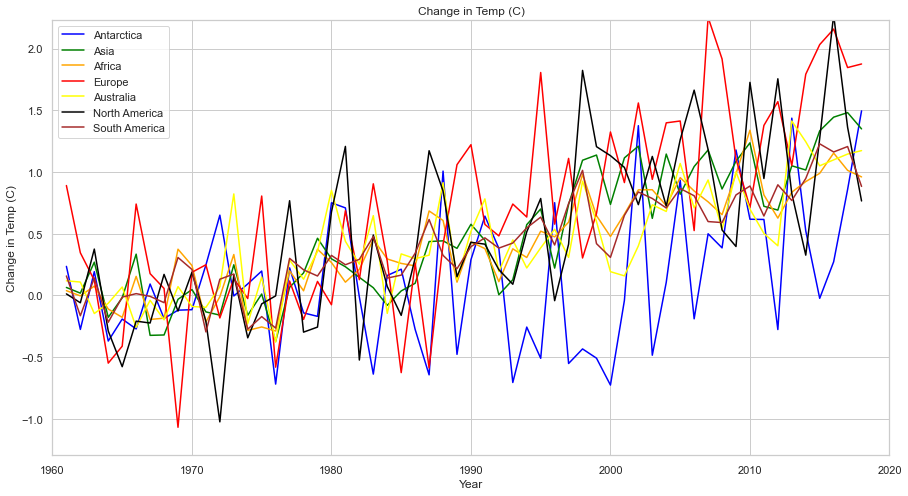

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")

x_axis = Ant_df['Year']
y_axis = Ant_df['Change in Temp (C)']
temp_line, = plt.plot(x_axis,y_axis, color = 'blue', label = 'Antarctica')

x_axis = Asia_df['Year']
y_axis = Asia_df['Change in Temp (C)']
temp_line, = plt.plot(x_axis,y_axis, color = 'green', label = 'Asia')

x_axis = Af_df['Year']
y_axis = Af_df['Change in Temp (C)']
temp_line, = plt.plot(x_axis,y_axis, color = 'orange', label = 'Africa')

x_axis = eur_df['Year']
y_axis = eur_df['Change in Temp (C)']
temp_line, = plt.plot(x_axis,y_axis, color = 'red', label = 'Europe')

x_axis = Aus_df['Year']
y_axis = Aus_df['Change in Temp (C)']
temp_line, = plt.plot(x_axis,y_axis, color = 'yellow', label = 'Australia')

x_axis = na_df['Year']
y_axis = na_df['Change in Temp (C)']
temp_line, = plt.plot(x_axis,y_axis, color = 'black', label = 'North America')

x_axis = sa_df['Year']
y_axis = sa_df['Change in Temp (C)']
temp_line, = plt.plot(x_axis,y_axis, color = 'brown',label = 'South America')


plt.xlim(1960,2020)
plt.ylim(y_axis.min() -1, y_axis.max() +1)
plt.xlabel("Year")
plt.ylabel("Change in Temp (C)")
plt.title("Change in Temp (C)")
plt.legend()



plt.savefig('temp_chart.png')
plt.show()